In [255]:
import pandas as pd

In [256]:
# Load the exchange rates data
exchange_rates_df = pd.read_csv('Complete_SGD_CNY_Exchange_Rates_Data.csv')

# Load the sentiment analysis data for China-related news
china_sentiment_df = pd.read_csv('china_news_with_sentiment.csv')

# Load the sentiment analysis data for Singapore-related news
singapore_sentiment_df = pd.read_csv('singapore_news_with_sentiment.csv')


In [257]:
exchange_rates_df.head()

,Unnamed: 0,success,timestamp,historical,base,date,rates,SGD_CNY_Rate
0,2023-10-11,True,1697068799,True,EUR,2023-10-11,"{'SGD': 1.447669, 'CNY': 7.755204}",5.357028
1,2023-10-12,True,1697155199,True,EUR,2023-10-12,"{'SGD': 1.443022, 'CNY': 7.694173}",5.331986
2,2023-10-13,True,1697241599,True,EUR,2023-10-13,"{'SGD': 1.441042, 'CNY': 7.680775}",5.330015
3,2023-10-14,True,1697327999,True,EUR,2023-10-14,"{'SGD': 1.441042, 'CNY': 7.680249}",5.329650
4,2023-10-15,True,1697414399,True,EUR,2023-10-15,"{'SGD': 1.440451, 'CNY': 7.552046}",5.242834


In [258]:
china_sentiment_df.head()

,Published At,Title,Source,Author,URL,Description,Content,title_sentiment,description_sentiment
0,2023-10-17T14:58:50Z,The US Just Escalated Its AI Chip War With China,Wired,Will Knight,https://www.wired.com/story/the-us-just-escala...,The American government has tightened its rest...,"At an event in Beijing this week, the Chinese ...",-0.5994,0.2500
1,2023-11-10T21:42:27Z,The NSA Seems Pretty Stressed About the Threat...,Wired,Lily Hay Newman,https://www.wired.com/story/nsa-china-hacking-...,US government officials continue to warn that ...,The United States National Security Agency is ...,-0.5994,-0.6808
2,2023-11-08T13:00:00Z,GM is attracted to these new non-rare earth ma...,The Verge,Andrew J. Hawkins,https://www.theverge.com/2023/11/8/23951557/gm...,GM is teaming up with Niron Magnetics to explo...,GM is attracted to these new non-rare earth ma...,0.4215,0.0000
3,2023-11-10T09:05:22Z,Meta may return to China with the release of a...,Engadget,Steve Dent,https://www.engadget.com/meta-may-return-to-ch...,Meta hasn't been in China since Facebook was b...,Meta hasn't been in China since Facebook was b...,0.0000,0.0516
4,2023-11-08T19:47:23Z,Pandas depart US National Zoo for China,BBC News,0,https://www.bbc.co.uk/news/av/world-us-canada-...,The three giant pandas were on loan from China...,After 23 years at the National Zoo in Washingt...,0.0000,0.0000


In [259]:
singapore_sentiment_df.head()

,Published At,Title,Source,Author,URL,Description,Content,title_sentiment,description_sentiment
0,2023-11-01T14:02:49Z,How Singapore is helping 'future-food' compani...,Business Insider,Sponsor Post,https://www.businessinsider.com/singapore-is-i...,More than 60 alternative protein companies cal...,Thanks to support from Singapore's Agency for ...,0.2960,0.0000
1,2023-10-15T12:14:01Z,"They viewed 16 apartments in 3 days, and final...",Business Insider,Amanda Goh,https://www.businessinsider.com/millennial-cou...,A lot of the vintage furniture and tile choice...,A balcony-like area with a bar table. The wind...,0.2500,0.0000
2,2023-10-13T11:48:07Z,"Man makes bomb threat on flight to Australia, ...",Boing Boing,Carla Sinclair,https://boingboing.net/2023/10/13/man-makes-bo...,An Australian man reportedly made a bomb threa...,An Australian man reportedly made a bomb threa...,-0.7184,-0.7184
3,2023-10-14T13:00:00Z,How China’s EV Boom Caught Western Car Compani...,Wired,Carlton Reid,https://www.wired.com/story/how-chinas-ev-boom...,"Auto execs in the US, Europe, and Japan never ...","David Tyfield, a professor of political econom...",0.0000,-0.5267
4,2023-11-08T00:30:01Z,Majoring in computer science isn't the road to...,Business Insider,Kwan Wei Kevin Tan,https://www.businessinsider.com/computer-scien...,"""The fact is that it's a hard job and getting ...",Joel Wong (pictured) is in his senior year at ...,0.5994,-0.1027


In [260]:
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date']).dt.date
china_sentiment_df['date'] = pd.to_datetime(china_sentiment_df['Published At']).dt.date
singapore_sentiment_df['date'] = pd.to_datetime(singapore_sentiment_df['Published At']).dt.date


In [261]:
# Group by 'Date' and aggregate (mean used in this example)
china_agg_sentiment_df = china_sentiment_df.groupby('date').mean().reset_index()
singapore_agg_sentiment_df = singapore_sentiment_df.groupby('date').mean().reset_index()

C:\Users\evely\AppData\Local\Temp\ipykernel_30388\3628983650.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  china_agg_sentiment_df = china_sentiment_df.groupby('date').mean().reset_index()
C:\Users\evely\AppData\Local\Temp\ipykernel_30388\3628983650.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  singapore_agg_sentiment_df = singapore_sentiment_df.groupby('date').mean().reset_index()


In [262]:

# Merge the dataframes on the 'Date' column
combined_df = exchange_rates_df.merge(china_agg_sentiment_df, on='date', how='left', suffixes=('', '_ch'))
combined_df = combined_df.merge(singapore_agg_sentiment_df, on='date', how='left', suffixes=('', '_sg'))
combined_df = combined_df.rename(columns={"title_sentiment":"title_sentiment_ch", "description_sentiment":"description_sentiment_ch"})
# Fill any missing values if necessary
combined_df.fillna(0, inplace=True)

# Save the combined data to a new CSV file
combined_df.to_csv('Combined_Data.csv', index=False)

print(combined_df)

    Unnamed: 0  success   timestamp  historical base        date  \
0   2023-10-11     True  1697068799        True  EUR  2023-10-11   
1   2023-10-12     True  1697155199        True  EUR  2023-10-12   
2   2023-10-13     True  1697241599        True  EUR  2023-10-13   
3   2023-10-14     True  1697327999        True  EUR  2023-10-14   
4   2023-10-15     True  1697414399        True  EUR  2023-10-15   
5   2023-10-16     True  1697500799        True  EUR  2023-10-16   
6   2023-10-17     True  1697587199        True  EUR  2023-10-17   
7   2023-10-18     True  1697673599        True  EUR  2023-10-18   
8   2023-10-19     True  1697759999        True  EUR  2023-10-19   
9   2023-10-20     True  1697846399        True  EUR  2023-10-20   
10  2023-10-21     True  1697932799        True  EUR  2023-10-21   
11  2023-10-22     True  1698019199        True  EUR  2023-10-22   
12  2023-10-23     True  1698105599        True  EUR  2023-10-23   
13  2023-10-24     True  1698191999        True 

In [263]:
combined_df.head()

,Unnamed: 0,success,timestamp,historical,base,date,rates,SGD_CNY_Rate,title_sentiment_ch,description_sentiment_ch,title_sentiment_sg,description_sentiment_sg
0,2023-10-11,True,1697068799,True,EUR,2023-10-11,"{'SGD': 1.447669, 'CNY': 7.755204}",5.357028,0.182900,-0.27870,0.038600,0.000000
1,2023-10-12,True,1697155199,True,EUR,2023-10-12,"{'SGD': 1.443022, 'CNY': 7.694173}",5.331986,-0.372833,0.05760,-0.159875,0.026900
2,2023-10-13,True,1697241599,True,EUR,2023-10-13,"{'SGD': 1.441042, 'CNY': 7.680775}",5.330015,0.098025,0.01140,0.033500,0.167267
3,2023-10-14,True,1697327999,True,EUR,2023-10-14,"{'SGD': 1.441042, 'CNY': 7.680249}",5.329650,0.170000,-0.26335,0.000000,-0.526700
4,2023-10-15,True,1697414399,True,EUR,2023-10-15,"{'SGD': 1.440451, 'CNY': 7.552046}",5.242834,0.389000,0.16235,0.193420,0.035900


In [264]:
combined_df = combined_df.drop(columns=['Unnamed: 0', 'success', 'timestamp', 'historical', 'base', 'rates'])

In [265]:
combined_df.set_index('date')

,SGD_CNY_Rate,title_sentiment_ch,description_sentiment_ch,title_sentiment_sg,description_sentiment_sg
date,,,,,
2023-10-11,5.357028,0.182900,-0.278700,0.038600,0.000000
2023-10-12,5.331986,-0.372833,0.057600,-0.159875,0.026900
2023-10-13,5.330015,0.098025,0.011400,0.033500,0.167267
2023-10-14,5.329650,0.170000,-0.263350,0.000000,-0.526700
2023-10-15,5.242834,0.389000,0.162350,0.193420,0.035900
2023-10-16,5.341858,0.258950,0.087350,0.243717,0.190283
2023-10-17,5.343192,-0.232200,0.278000,0.255600,0.520838
2023-10-18,5.325841,-0.600700,-0.787650,-0.101967,-0.142700
2023-10-19,5.326895,-0.037720,0.097980,0.214740,0.410920


In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

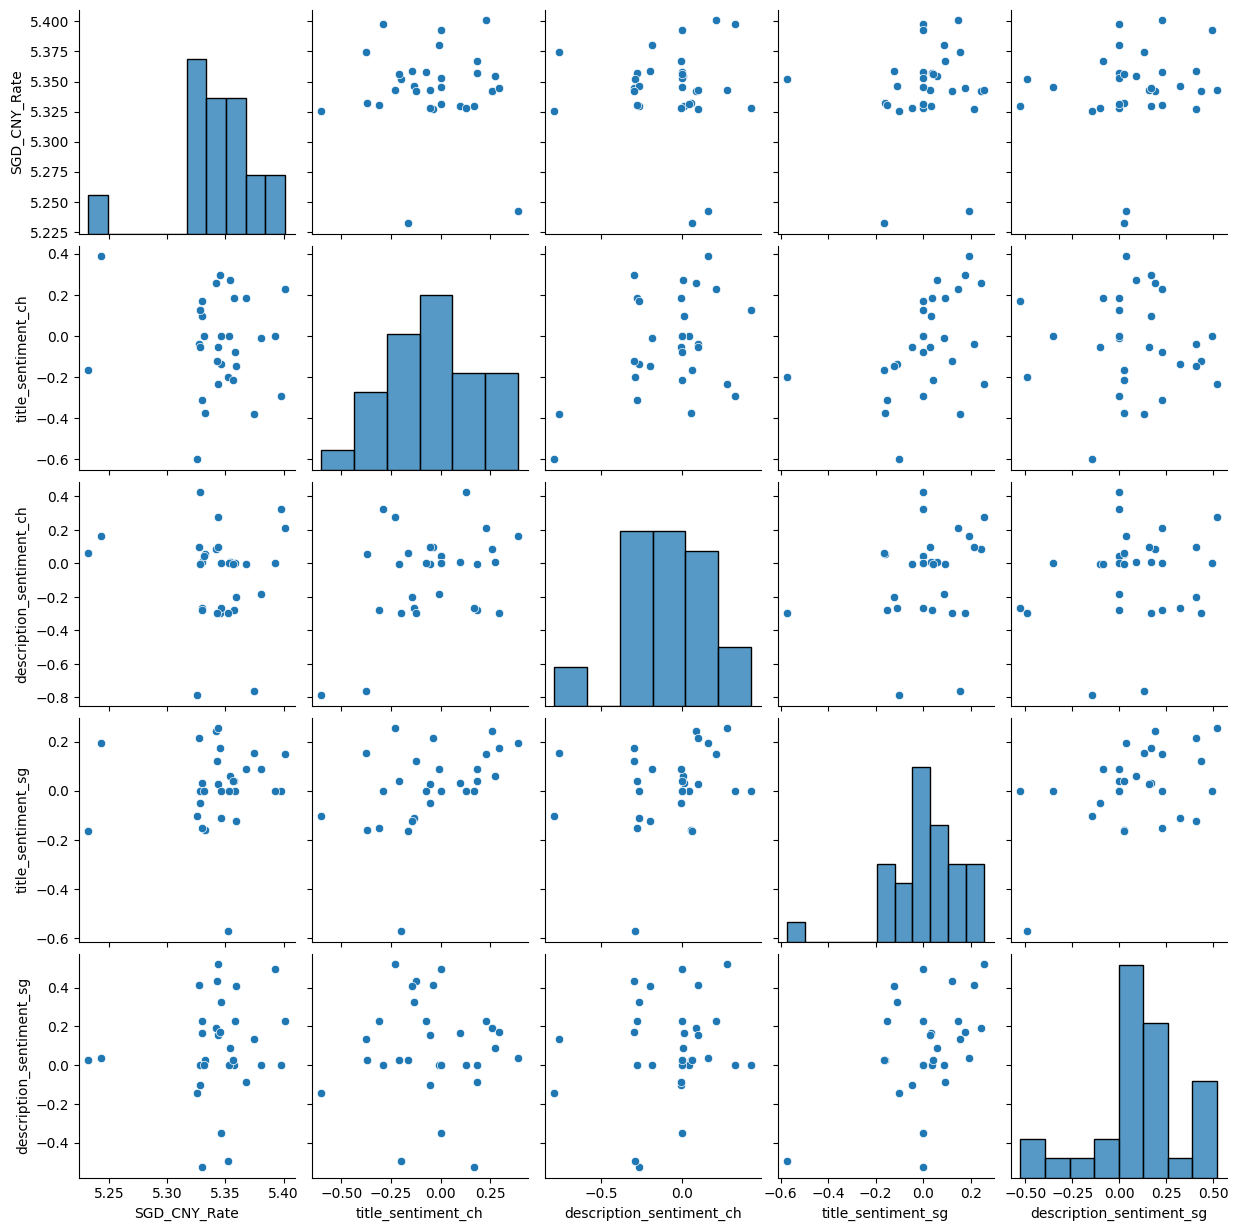

In [267]:
sns.pairplot(combined_df)

In [268]:
# Calculate changes
combined_df['title_sentiment_change_sg'] = combined_df['title_sentiment_sg'].diff()
combined_df['title_sentiment_change_ch'] = combined_df['title_sentiment_ch'].diff()
combined_df['description_sentiment_change_sg'] = combined_df['description_sentiment_sg'].diff()
combined_df['description_sentiment_change_ch'] = combined_df['description_sentiment_ch'].diff()
combined_df['sgd_cny_rate_change'] = combined_df['SGD_CNY_Rate'].diff()

combined_df.head()

,date,SGD_CNY_Rate,title_sentiment_ch,description_sentiment_ch,title_sentiment_sg,description_sentiment_sg,title_sentiment_change_sg,title_sentiment_change_ch,description_sentiment_change_sg,description_sentiment_change_ch,sgd_cny_rate_change
0,2023-10-11,5.357028,0.182900,-0.27870,0.038600,0.000000,NaN,NaN,NaN,NaN,NaN
1,2023-10-12,5.331986,-0.372833,0.05760,-0.159875,0.026900,-0.198475,-0.555733,0.026900,0.33630,-0.025043
2,2023-10-13,5.330015,0.098025,0.01140,0.033500,0.167267,0.193375,0.470858,0.140367,-0.04620,-0.001971
3,2023-10-14,5.329650,0.170000,-0.26335,0.000000,-0.526700,-0.033500,0.071975,-0.693967,-0.27475,-0.000365
4,2023-10-15,5.242834,0.389000,0.16235,0.193420,0.035900,0.193420,0.219000,0.562600,0.42570,-0.086815


In [269]:
# Calculate changes (including a 1-day lag)
combined_df['prev_title_sentiment_change_sg'] = combined_df['title_sentiment_sg'].shift(1).diff()
combined_df['prev_title_sentiment_change_ch'] = combined_df['title_sentiment_ch'].shift(1).diff()
combined_df['prev_description_sentiment_change_sg'] = combined_df['description_sentiment_sg'].shift(1).diff()
combined_df['prev_description_sentiment_change_ch'] = combined_df['description_sentiment_ch'].shift(1).diff()
combined_df['prev_sgd_cny_rate_change'] = combined_df['SGD_CNY_Rate'].shift(1).diff()

In [270]:
combined_df.head()

,date,SGD_CNY_Rate,title_sentiment_ch,description_sentiment_ch,title_sentiment_sg,description_sentiment_sg,title_sentiment_change_sg,title_sentiment_change_ch,description_sentiment_change_sg,description_sentiment_change_ch,sgd_cny_rate_change,prev_title_sentiment_change_sg,prev_title_sentiment_change_ch,prev_description_sentiment_change_sg,prev_description_sentiment_change_ch,prev_sgd_cny_rate_change
0,2023-10-11,5.357028,0.182900,-0.27870,0.038600,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-12,5.331986,-0.372833,0.05760,-0.159875,0.026900,-0.198475,-0.555733,0.026900,0.33630,-0.025043,NaN,NaN,NaN,NaN,NaN
2,2023-10-13,5.330015,0.098025,0.01140,0.033500,0.167267,0.193375,0.470858,0.140367,-0.04620,-0.001971,-0.198475,-0.555733,0.026900,0.33630,-0.025043
3,2023-10-14,5.329650,0.170000,-0.26335,0.000000,-0.526700,-0.033500,0.071975,-0.693967,-0.27475,-0.000365,0.193375,0.470858,0.140367,-0.04620,-0.001971
4,2023-10-15,5.242834,0.389000,0.16235,0.193420,0.035900,0.193420,0.219000,0.562600,0.42570,-0.086815,-0.033500,0.071975,-0.693967,-0.27475,-0.000365


In [271]:
# Define thresholds
sentiment_threshold = 0.5  # example threshold for significant sentiment change
rate_threshold = 0.02  # example threshold for significant rate change

# Assuming a predefined risk tolerance and capital
risk_tolerance_percent = 2  # Risking 2% of capital on each trade
total_capital = 10000  # Total trading capital

# Initialize a list to store the trade outcomes
trade_dates = {'Buy': [], 'Sell': []}  # Dictionary to store trade dates
trade_outcomes = []

In [272]:
# Trading logic
for index, row in combined_df.iterrows():
    if index == 0:
        continue  # Skip the first row as it has no previous day data

    trade_action = None
    entry_price = row['SGD_CNY_Rate']

    if row['title_sentiment_change_sg'] > sentiment_threshold and row['SGD_CNY_Rate'] > rate_threshold:
        trade_action = 'Buy'
    elif row['title_sentiment_change_sg'] < -sentiment_threshold and row['SGD_CNY_Rate'] < -rate_threshold:
        trade_action = 'Sell'
    elif row['description_sentiment_change_sg'] > sentiment_threshold and row['SGD_CNY_Rate'] > rate_threshold:
        trade_action = 'Buy'
    elif row['description_sentiment_change_sg'] < - sentiment_threshold and row['SGD_CNY_Rate'] < -rate_threshold:
        trade_action = 'Sell'
    elif row['title_sentiment_change_ch'] > sentiment_threshold and row['SGD_CNY_Rate'] > rate_threshold:
        trade_action = 'Sell'
    elif row['title_sentiment_change_ch'] < - sentiment_threshold and row['SGD_CNY_Rate'] < - rate_threshold:
        trade_action = 'Buy'
    elif row['description_sentiment_change_ch'] > sentiment_threshold and row['SGD_CNY_Rate'] > rate_threshold:
        trade_action = 'Sell'
    elif row['description_sentiment_change_ch'] < -sentiment_threshold and row['SGD_CNY_Rate'] < -rate_threshold:
        trade_action = 'Buy'

    if trade_action:
        
        # Record the date of the trade
        if trade_action == 'Buy':
            trade_dates['Buy'].append(row['date'])
        elif trade_action == 'Sell':
            trade_dates['Sell'].append(row['date'])
            
        # Assuming you close the trade on the next day
        if index + 1 < len(combined_df):
            exit_price = combined_df.iloc[index + 1]['SGD_CNY_Rate']
            profit = exit_price - entry_price if trade_action == 'Buy' else entry_price - exit_price
            trade_outcomes.append(profit)
        
        


In [273]:
# Print results
print("Final Capital:", total_capital)
print("Total Trades:", len(trade_outcomes))
print("Average Profit/Loss per Trade:", sum(trade_outcomes)/len(trade_outcomes) if trade_outcomes else 0)

Final Capital: 10000
Total Trades: 4
Average Profit/Loss per Trade: 0.02555651106039969


In [274]:
# Backtesting results
total_profit = sum(trade_outcomes)
print("Total Profit from Strategy:", total_profit)
print("Number of Trades:", len(trade_outcomes))
print("Average Profit per Trade:", total_profit / len(trade_outcomes) if trade_outcomes else 0)

Total Profit from Strategy: 0.10222604424159876
Number of Trades: 4
Average Profit per Trade: 0.02555651106039969


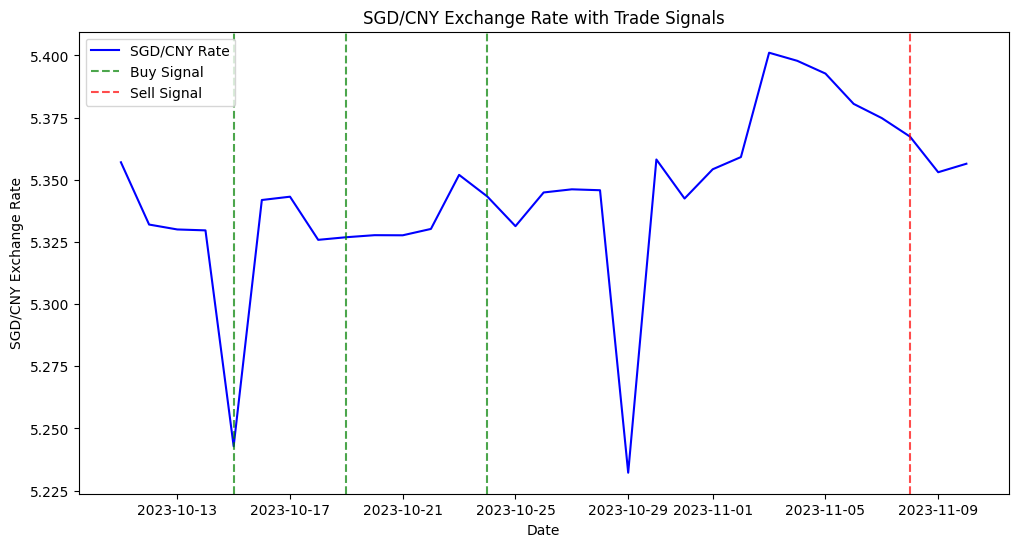

In [275]:
# Plotting the SGD/CNY exchange rate
plt.figure(figsize=(12, 6))
plt.plot(combined_df['date'], combined_df['SGD_CNY_Rate'], label='SGD/CNY Rate', color='blue')

# Plotting buy signals
for buy_date in trade_dates['Buy']:
    plt.axvline(x=buy_date, color='green', linestyle='--', alpha=0.7, label='Buy Signal' if buy_date == trade_dates['Buy'][0] else "")

# Plotting sell signals
for sell_date in trade_dates['Sell']:
    plt.axvline(x=sell_date, color='red', linestyle='--', alpha=0.7, label='Sell Signal' if sell_date == trade_dates['Sell'][0] else "")

plt.xlabel('Date')
plt.ylabel('SGD/CNY Exchange Rate')
plt.title('SGD/CNY Exchange Rate with Trade Signals')
plt.legend()
plt.show()

Took note that I don't have today's data when executing today's actions, so I can only use yesterday's data.

In [276]:
sentiment_threshold = 0.3  # example threshold for significant sentiment change
rate_threshold = 0.02  # example threshold for significant rate change

#re-initialize
trade_outcomes = []
trade_dates = {'Buy': [], 'Sell': []}  # Dictionary to store trade dates



In [277]:
# Trading logic


for index, row in combined_df.iterrows():
    if index < 2:
        continue  # Skip the first two rows as they don't have enough previous data

    trade_action = None
    entry_price = row['SGD_CNY_Rate']

    if row['prev_title_sentiment_change_sg'] > sentiment_threshold and row['prev_sgd_cny_rate_change'] > rate_threshold:
        trade_action = 'Buy'
    elif row['prev_title_sentiment_change_sg'] < -sentiment_threshold and row['prev_sgd_cny_rate_change'] < -rate_threshold:
        trade_action = 'Sell'
    elif row['prev_description_sentiment_change_sg'] > sentiment_threshold and row['prev_sgd_cny_rate_change'] > rate_threshold:
        trade_action = 'Buy'
    elif row['prev_description_sentiment_change_sg'] < -sentiment_threshold and row['prev_sgd_cny_rate_change'] < -rate_threshold:
        trade_action = 'Sell'
    elif row['prev_title_sentiment_change_ch'] > sentiment_threshold and row['prev_sgd_cny_rate_change'] > rate_threshold:
        trade_action = 'Sell'
    elif row['prev_title_sentiment_change_ch'] < -sentiment_threshold and row['prev_sgd_cny_rate_change'] < -rate_threshold:
        trade_action = 'Buy'
    elif row['prev_description_sentiment_change_ch'] > sentiment_threshold and row['prev_sgd_cny_rate_change'] > rate_threshold:
        trade_action = 'Sell'
    elif row['prev_description_sentiment_change_ch'] < -sentiment_threshold and row['prev_sgd_cny_rate_change'] < -rate_threshold:
        trade_action = 'Buy'

    if trade_action:
        # Record the date of the trade
        if trade_action == 'Buy':
            trade_dates['Buy'].append(row['date'])
        elif trade_action == 'Sell':
            trade_dates['Sell'].append(row['date'])
    # Assuming you close the trade on the next day
        if index + 1 < len(combined_df):
            exit_price = combined_df.iloc[index + 1]['SGD_CNY_Rate']
            profit = exit_price - entry_price if trade_action == 'Buy' else entry_price - exit_price
            trade_outcomes.append(profit)

In [278]:
# Backtesting results
total_profit = sum(trade_outcomes)
print("Total Profit from Strategy:", total_profit)
print("Number of Trades:", len(trade_outcomes))
print("Average Profit per Trade:", total_profit / len(trade_outcomes) if trade_outcomes else 0)

Total Profit from Strategy: 0.004763140515266606
Number of Trades: 2
Average Profit per Trade: 0.002381570257633303


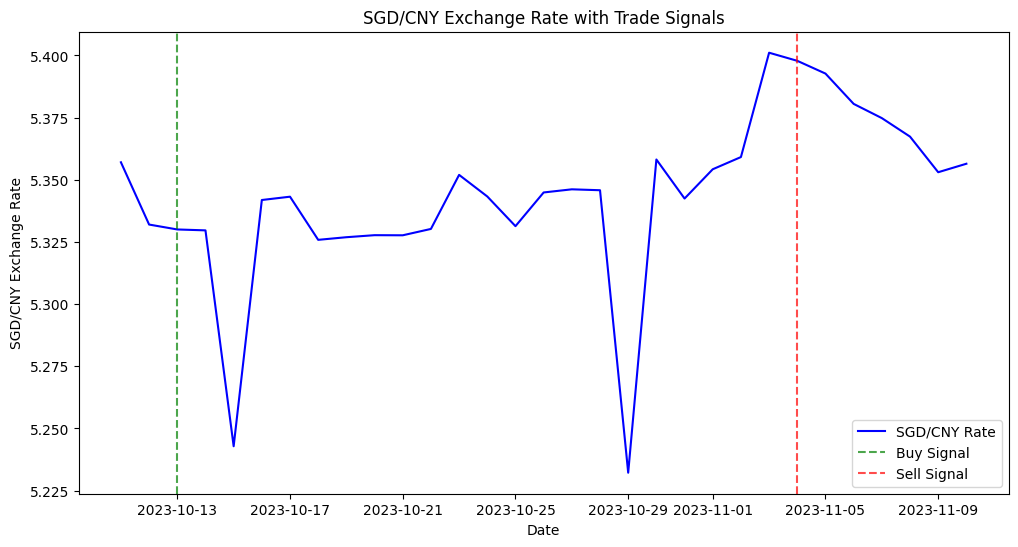

In [279]:
# Plotting the SGD/CNY exchange rate
plt.figure(figsize=(12, 6))
plt.plot(combined_df['date'], combined_df['SGD_CNY_Rate'], label='SGD/CNY Rate', color='blue')

# Plotting buy signals
for buy_date in trade_dates['Buy']:
    plt.axvline(x=buy_date, color='green', linestyle='--', alpha=0.7, label='Buy Signal' if buy_date == trade_dates['Buy'][0] else "")

# Plotting sell signals
for sell_date in trade_dates['Sell']:
    plt.axvline(x=sell_date, color='red', linestyle='--', alpha=0.7, label='Sell Signal' if sell_date == trade_dates['Sell'][0] else "")

plt.xlabel('Date')
plt.ylabel('SGD/CNY Exchange Rate')
plt.title('SGD/CNY Exchange Rate with Trade Signals')
plt.legend()
plt.show()

Time Series Plot

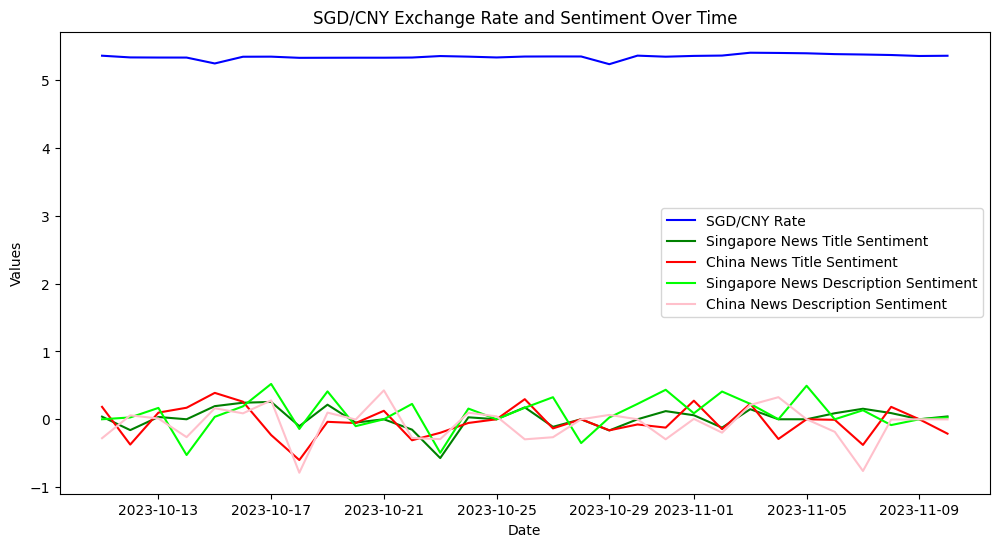

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(combined_df['date'], combined_df['SGD_CNY_Rate'], label='SGD/CNY Rate', color='blue')
plt.plot(combined_df['date'], combined_df['title_sentiment_sg'], label='Singapore News Title Sentiment', color='green')
plt.plot(combined_df['date'], combined_df['title_sentiment_ch'], label='China News Title Sentiment', color='red')
plt.plot(combined_df['date'], combined_df['description_sentiment_sg'], label='Singapore News Description Sentiment', color='lime')
plt.plot(combined_df['date'], combined_df['description_sentiment_ch'], label='China News Description Sentiment', color='pink')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('SGD/CNY Exchange Rate and Sentiment Over Time')
plt.legend()
plt.show()


Scatter Plot with Regression Line

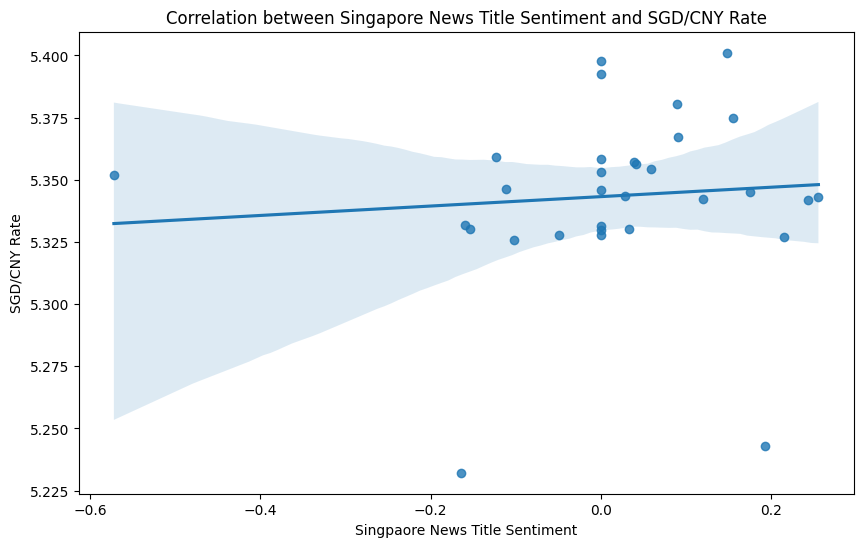

In [281]:
# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x=combined_df['title_sentiment_sg'], y=combined_df['SGD_CNY_Rate'])
plt.xlabel('Singpaore News Title Sentiment')
plt.ylabel('SGD/CNY Rate')
plt.title('Correlation between Singapore News Title Sentiment and SGD/CNY Rate')
plt.show()

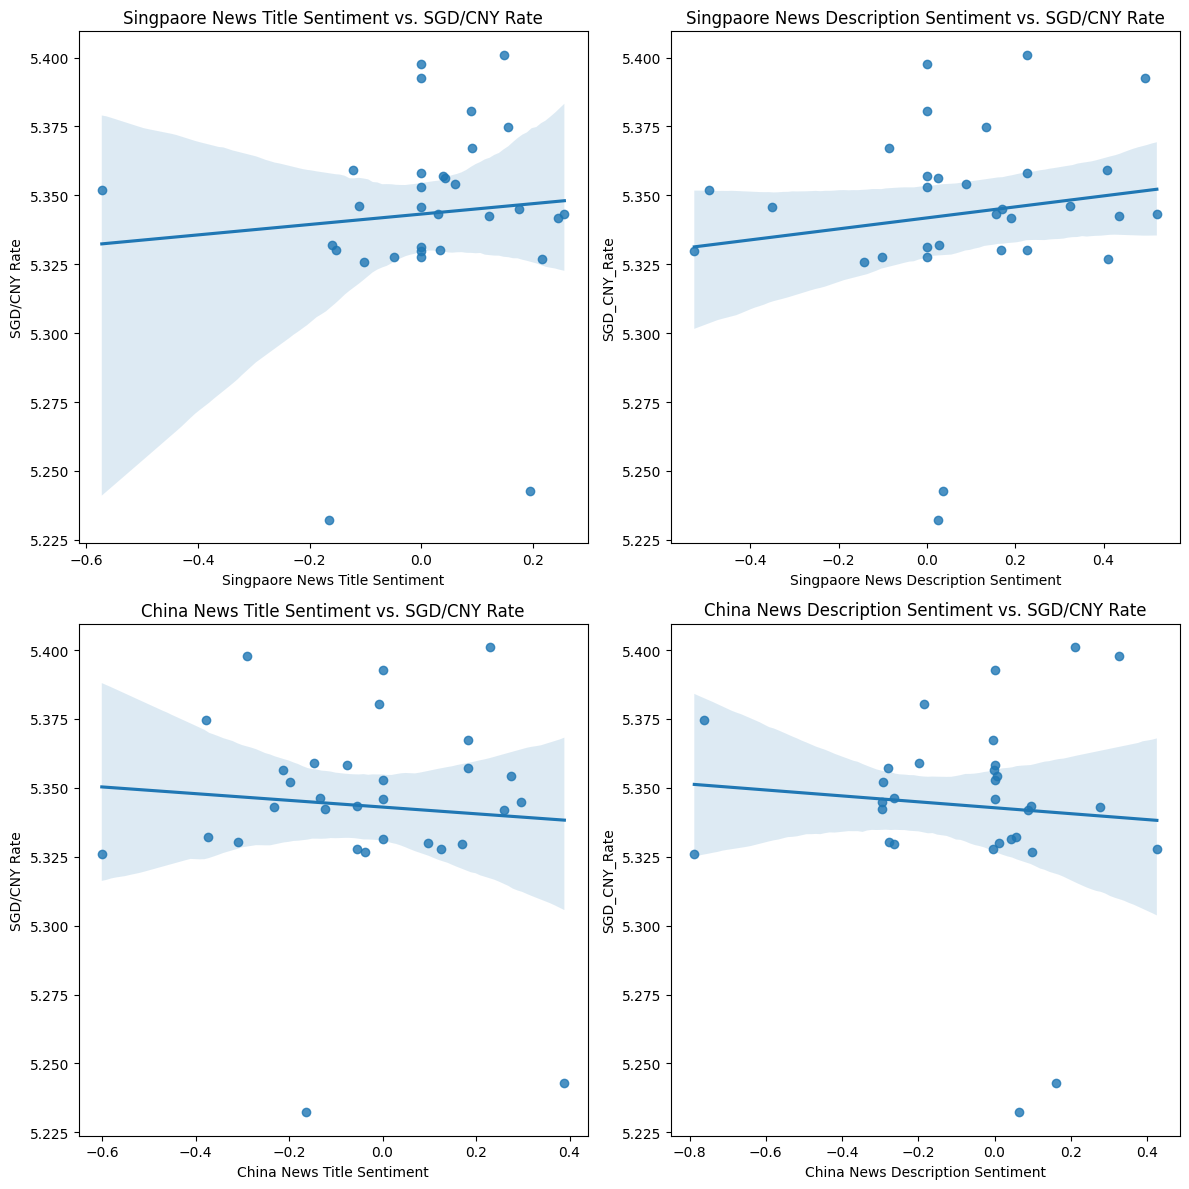

In [282]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Scatter Plot 1: SG Title Sentiment vs. SGD/CNY Rate
sns.regplot(x='title_sentiment_sg', y='SGD_CNY_Rate', data=combined_df, ax=axs[0, 0])
axs[0, 0].set_title('Singpaore News Title Sentiment vs. SGD/CNY Rate')
axs[0, 0].set_xlabel('Singpaore News Title Sentiment')
axs[0, 0].set_ylabel('SGD/CNY Rate')

# Scatter Plot 2: SG Description Sentiment vs. SGD/CNY Rate
sns.regplot(x='description_sentiment_sg', y='SGD_CNY_Rate', data=combined_df, ax=axs[0, 1])
axs[0, 1].set_title('Singpaore News Description Sentiment vs. SGD/CNY Rate')
axs[0, 1].set_xlabel('Singpaore News Description Sentiment')

# Scatter Plot 3: CH Title Sentiment vs. SGD/CNY Rate
sns.regplot(x='title_sentiment_ch', y='SGD_CNY_Rate', data=combined_df, ax=axs[1, 0])
axs[1, 0].set_title('China News Title Sentiment vs. SGD/CNY Rate')
axs[1, 0].set_xlabel('China News Title Sentiment')
axs[1, 0].set_ylabel('SGD/CNY Rate')

# Scatter Plot 4: CH Description Sentiment vs. SGD/CNY Rate
sns.regplot(x='description_sentiment_ch', y='SGD_CNY_Rate', data=combined_df, ax=axs[1, 1])
axs[1, 1].set_title('China News Description Sentiment vs. SGD/CNY Rate')
axs[1, 1].set_xlabel('China News Description Sentiment')

plt.tight_layout()
plt.show()

Correlation Heatmap

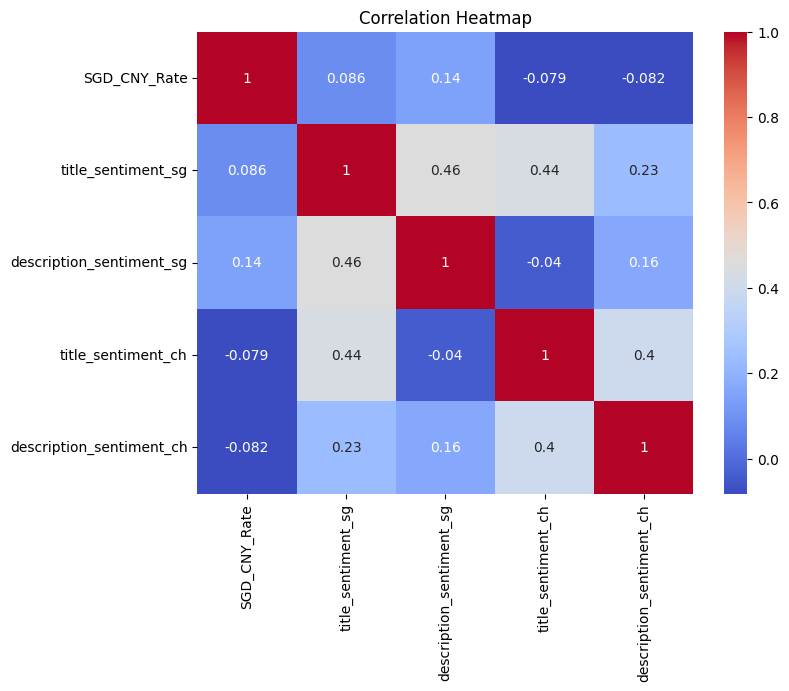

In [283]:
# Correlation Heatmap
correlation_matrix = combined_df[['SGD_CNY_Rate', 'title_sentiment_sg', 'description_sentiment_sg', 'title_sentiment_ch', 'description_sentiment_ch']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()